# Re-exécution pour modifier les légendes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from datetime import datetime

import sys
sys.path.append('../../../../../')
from metrics import utilities_functions as uf
u_functions = uf.functions()

## Chargement du jeu de données Shuttle

Shuttle contient 10 attributs dont le dernier est la classe à expliquer.
Il y a 46464 observations dont 878 anormales.
Avec le dernier attribut, nous avons les classes "o" pour les anomalies et "n" pour les observations normales.

In [2]:
data_brut_Shuttle = pd.read_csv('../../../../../datasets/datasets_publics/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X_Shuttle = data_brut_Shuttle[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut_Shuttle = data_brut_Shuttle[[9]]
data_brut_Shuttle.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


## Transformation de la classe à expliquer

L'objectif ici est de remplacer les "o" par -1 et les "n" par 1 afin de faire les matrices de confusion avec la fonction dédiée de scikit-learn.

In [3]:
y_transform_Shuttle = y_brut_Shuttle
y_transform_Shuttle = np.where(y_transform_Shuttle=='o',-1,1)
#y_transform

## General Parameters

In [4]:
data_name = "Shuttle"
method_name = "IForest"
execution_object = "ImpactDeTailleEchantillon"
save_fig=False

## Shuttle

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier n_estimators

### Impact du nombre d'arbre sur les performances de IForest
Utilisant les valeurs par défaut des paramètres de IForest au niveau de scikit-learn

In [5]:
MS_executions_time_IF_Shuttle = []
MS_roc_auc_IF_Shuttle = []
MS_precisions_IF_Shuttle = []
MS_recalls_IF_Shuttle = []
MS_f1_scores_IF_Shuttle = []
MS_tn_IF_Shuttle = []
MS_fp_IF_Shuttle = []
MS_fn_IF_Shuttle = []
MS_tp_IF_Shuttle = []
MS_specificity_IF_Shuttle = []
MS_max_samples_IF_Shuttle = []

for j in range(100, len(X_Shuttle), 1000):
    print("max_samples = "+str(j))
    max_samples = j
    MS_max_samples_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    MS_func_IF_Shuttle = IsolationForest(max_samples=max_samples, behaviour="new")
    MS_func_IF_Shuttle.fit(X_Shuttle)
    MS_y_pred_IF_Shuttle = MS_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    MS_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    MS_executions_time_IF_Shuttle.append(MS_exec_time_IF_Shuttle)
    
    # Precision
    MS_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Recall
    MS_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # f1_score
    MS_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Specificity
    MS_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    MS_tn_IF_Shuttle.append(tn)
    MS_fp_IF_Shuttle.append(fp)
    MS_fn_IF_Shuttle.append(fn)
    MS_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    MS_y_DF_IF_Shuttle = MS_func_IF_Shuttle.decision_function(X_Shuttle)
    MS_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, MS_y_DF_IF_Shuttle)
    MS_roc_auc_IF_Shuttle.append(MS_auc_IF_Shuttle)
    

max_samples = 100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 1100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 2100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 3100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 4100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 5100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 6100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 7100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 8100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 9100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 10100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 11100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 12100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 13100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 14100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 15100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 16100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 17100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 18100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 19100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 20100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 21100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 22100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 23100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 24100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 25100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 26100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 27100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 28100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 29100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 30100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 31100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 32100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 33100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 34100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 35100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 36100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 37100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 38100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 39100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 40100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 41100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 42100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 43100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 44100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 45100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


max_samples = 46100


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [6]:
'''
    Ajouter les données dans un tableau
    Sauvegarder les données dans un fichier .csv
'''

data = []
names = []
names.append("Sample Size")
data.append(MS_max_samples_IF_Shuttle)

names.append("CPU Time(s)")
data.append(MS_executions_time_IF_Shuttle)
names.append("ROC AUC")
data.append(MS_roc_auc_IF_Shuttle)
names.append("Recall")
data.append(MS_recalls_IF_Shuttle)
names.append("Specificity")
data.append(MS_specificity_IF_Shuttle)

names.append("Precision")
data.append(MS_precisions_IF_Shuttle)
names.append("F1 Score")
data.append(MS_f1_scores_IF_Shuttle)
names.append("TN")
data.append(MS_tn_IF_Shuttle)
names.append("FP")
data.append(MS_fp_IF_Shuttle)
names.append("FN")
data.append(MS_fn_IF_Shuttle)
names.append("TP")
data.append(MS_tp_IF_Shuttle)

print(names)
print(data)
#data_file_name = save_results_data(data=data, names=names, data_name="IForest", method_name="Shuttle")
data_file_name = u_functions.save_results_data(data=data, names=names, data_name=data_name, method_name=method_name,
                                               execution_object=execution_object)

['Sample Size', 'CPU Time(s)', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'F1 Score', 'TN', 'FP', 'FN', 'TP']
[[100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100, 40100, 41100, 42100, 43100, 44100, 45100, 46100], [2.2997827529907227, 2.8913581371307373, 2.41323184967041, 4.443613052368164, 2.962307929992676, 2.7697830200195312, 2.8118162155151367, 2.8224010467529297, 2.8264832496643066, 2.9876201152801514, 3.060944080352783, 3.0184099674224854, 3.030498743057251, 3.0182456970214844, 3.026702880859375, 3.029710054397583, 3.041606903076172, 3.2927041053771973, 3.253340005874634, 3.5252108573913574, 3.4012179374694824, 4.574434041976929, 3.5392839908599854, 4.055992841720581, 5.238908767700195, 4.969115734100342, 4.134817838668823, 4.144684076309204, 3.916595935821533,

           0                  1                   2                   3   \
count      47                 47                  47                  47   
unique     47                 47                  47                  31   
top     41100  3.609356164932251  0.9943857898265731  0.9992102838590795   
freq        1                  1                   1                   5   

                        4                   5                   6      7   8   \
count                   47                  47                  47     47  47   
unique                  44                  47                  47     31  31   
top     0.9806378132118451  0.9862509472772545  0.9926883220189384  45550  36   
freq                     2                   1                   1      5   5   

        9    10  
count   47   47  
unique  44   44  
top     18  861  
freq     2    2  

       0                   1                   2                   3   \
1     100  2.2997827529907227  0.9950992526878781

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

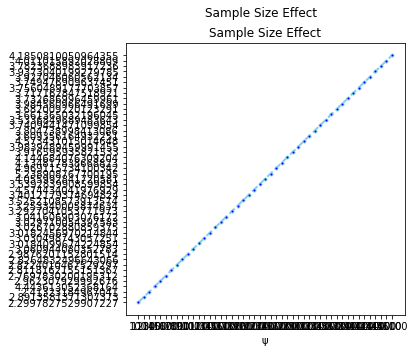

In [7]:
## Evolution de CPU Time
title="Sample Size Effect"
x_name = "ψ"
x_column = 0
y_name = "CPU Time(s)"
y_column=1
u_functions.plot_with_data(file_name=data_file_name, x_name=x_name, x_column = x_column,
               y_name = y_name, y_column=y_column, z_name="NULL", z_column="NULL", 
                   title=title, version="Shuttle", n_dimensions = 2, save_fig=save_fig)

In [ ]:
# Evolution du ROC AUC
title="Sample Size Effect"
x_name = "ψ"
x_column = 0
y_name = "ROC AUC"
y_column=2
u_functions.plot_with_data(file_name=data_file_name, x_name=x_name, x_column = x_column,
               y_name = y_name, y_column=y_column, z_name="NULL", z_column="NULL", 
                   title=title, version="Shuttle", n_dimensions = 2, save_fig=save_fig)

In [ ]:
# Evolution du rappel
title="Sample Size Effect"
x_name = "ψ"
x_column = 0
y_name = "Recall"
y_column=3
u_functions.plot_with_data(file_name=data_file_name, x_name=x_name, x_column = x_column,
               y_name = y_name, y_column=y_column, z_name="NULL", z_column="NULL", 
                   title=title, version="Shuttle", n_dimensions = 2, save_fig=save_fig)

In [ ]:
# Evolution de spécificité
title="Sample Size Effect"
x_name = "ψ"
x_column = 0
y_name = "Specificity"
y_column=4
u_functions.plot_with_data(file_name=data_file_name, x_name=x_name, x_column = x_column,
               y_name = y_name, y_column=y_column, z_name="NULL", z_column="NULL", 
                   title=title, version="Shuttle", n_dimensions = 2, save_fig=save_fig)

#### Conclusion
Malgré le caractère aléatoire de IForest, les métrics choisis ont tendance à être constant durant l'exécution successive avec les mêmes paramètres.